# Finite-Difference comparison
In this notebook, we propose some experiments in order to compare our algorithm with other finite-differences methods.

## Imports

In [1]:
import os
import numpy as np
from sszd import SSZD
import matplotlib
import matplotlib.pyplot as plt
from experiments_utils.synthetic_functions import StronglyConvexFunction, PLNonConvexFunction

out_dir = "./results/fd_comparison"

os.makedirs(out_dir, exist_ok=True)

## Auxiliary functions and variables

In [2]:
d = 20 # dimensions
rnd_state = np.random.RandomState(seed=1212)
strong_conv_target = StronglyConvexFunction(d, seed=12)
non_conv_target = PLNonConvexFunction(d, seed=12)


In [3]:
def execute_experiment(alg, target, budget, x, z):
    y_fun = [target.get_exact_value(x)]
    for k in range(1, budget):
        x, grad = alg.step(target, x, z)
        z = rnd_state.randint(low=0, high=d)
        y_fun.append(target.get_exact_value(x))
    return y_fun

## Convex Setting

In [37]:
# Parameters

alpha = lambda k :  0.15 * (1/k ** (1/2 + 1e-10)) # Step-size
alpha_big = lambda k :  0.15 * (1/k ** (1/2 + 1e-10)) # Step-size

h = lambda k : 1/k # Discretization parameter

reps = 1

y_nesterov = []
y_duchi = []
y_sszd_sph = []
y_sszd_coo = []

for _ in range(reps):
    nesterov = SSZD('gaussian', d, 1,  alpha, h,  dtype = np.float64, seed = 12)
    duchi = SSZD('gaussian', d, d,  alpha, h,  dtype = np.float64, seed = 12)
    sszd_sph = SSZD('spherical', d, d,  alpha_big, h,  dtype = np.float64, seed = 12)
    sszd_coo = SSZD('coordinate', d, d,  alpha_big, h,  dtype = np.float64, seed = 12)

    x = np.asarray([1.0 for _ in range(d)])
    z = 0

    budget = 10000

    y_nesterov.append(execute_experiment(nesterov, strong_conv_target, budget, x, z))
    y_duchi.append(execute_experiment(duchi, strong_conv_target, budget, x, z))
    y_sszd_sph.append(execute_experiment(sszd_sph, strong_conv_target, budget, x, z))
    y_sszd_coo.append(execute_experiment(sszd_coo, strong_conv_target, budget, x, z))

In [5]:
nest_mean, nest_std = np.mean(y_nesterov, axis=0), np.std(y_nesterov, axis=0) 
duchi_mean, duchi_std = np.mean(y_duchi, axis=0), np.std(y_duchi, axis=0) 
sph_mean, sph_std = np.mean(y_sszd_sph, axis=0), np.std(y_sszd_sph, axis=0)
coo_mean, coo_std = np.mean(y_sszd_coo, axis=0), np.std(y_sszd_coo, axis=0)


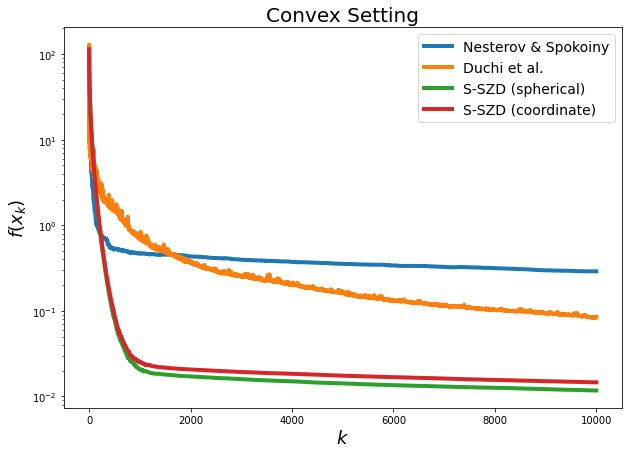

In [6]:

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Convex Setting", fontsize=20)
ax.plot(range(len(nest_mean)),  nest_mean, '-', lw=4, label="Nesterov & Spokoiny")
ax.fill_between(range(len(nest_mean)),  nest_mean + nest_std, nest_mean - nest_std, alpha=0.4)

ax.plot(range(len(duchi_mean)), duchi_mean, '-', lw=4, label="Duchi et al.")
ax.fill_between(range(len(duchi_mean)),  duchi_mean + duchi_std, duchi_mean - duchi_std, alpha=0.4)

ax.plot(range(len(sph_mean)),   sph_mean, '-', lw=4, label="S-SZD (spherical)")
ax.fill_between(range(len(sph_mean)),  sph_mean + sph_std, sph_mean - sph_std, alpha=0.4)

ax.plot(range(len(coo_mean)),   coo_mean, '-', lw=4, label="S-SZD (coordinate)")
ax.fill_between(range(len(coo_mean)),  coo_mean + coo_std, coo_mean - coo_std, alpha=0.4)

ax.set_xlabel("$k$", fontsize=18)
ax.set_ylabel("$f(x_k)$", fontsize=18)
ax.legend(loc="upper right", fontsize=14)
ax.set_yscale("log")

#plt.savefig(out_dir + "/convex.pdf", bbox_inches='tight', transparent=True)

# Non-convex PL

20.73132166477695


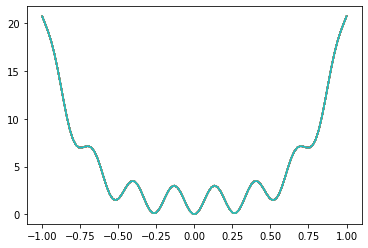

In [38]:
X = np.linspace([-1 for _ in range(d)], [1 for _ in range(d)], 100)
y = [non_conv_target.get_exact_value(x) for x in X]

print(non_conv_target.get_exact_value(X[0]))

fig, ax = plt.subplots()
ax.plot(X, y, '-')


In [38]:
# Parameters

alpha = lambda k :  0.125 * (1/k) # Step-size
alpha_big = lambda k :  0.125 * (1/k ** (1/2 + 1e-10)) # Step-size

h = lambda k : 1/k # Discretization parameter

reps = 1

y_nesterov = []
y_duchi = []
y_sszd_sph = []
y_sszd_coo = []

for _ in range(reps):
    nesterov = SSZD('gaussian', d, 1,  alpha, h,  dtype = np.float64, seed = 12)
    duchi = SSZD('gaussian', d, d,  alpha, h,  dtype = np.float64, seed = 12)
    sszd_sph = SSZD('spherical', d, d,  alpha, h,  dtype = np.float64, seed = 12)
    sszd_coo = SSZD('coordinate', d, d,  alpha, h,  dtype = np.float64, seed = 12)

    x = np.asarray([1.0 for _ in range(d)])
    z = 0

    budget = 1000

    y_nesterov.append(execute_experiment(nesterov, non_conv_target, budget, x, z))
    y_duchi.append(execute_experiment(duchi, non_conv_target, budget, x, z))
    y_sszd_sph.append(execute_experiment(sszd_sph, non_conv_target, budget, x, z))
    y_sszd_coo.append(execute_experiment(sszd_coo, non_conv_target, budget, x, z))

In [39]:
nest_mean, nest_std = np.mean(y_nesterov, axis=0), np.std(y_nesterov, axis=0) 
duchi_mean, duchi_std = np.mean(y_duchi, axis=0), np.std(y_duchi, axis=0) 
sph_mean, sph_std = np.mean(y_sszd_sph, axis=0), np.std(y_sszd_sph, axis=0)
coo_mean, coo_std = np.mean(y_sszd_coo, axis=0), np.std(y_sszd_coo, axis=0)


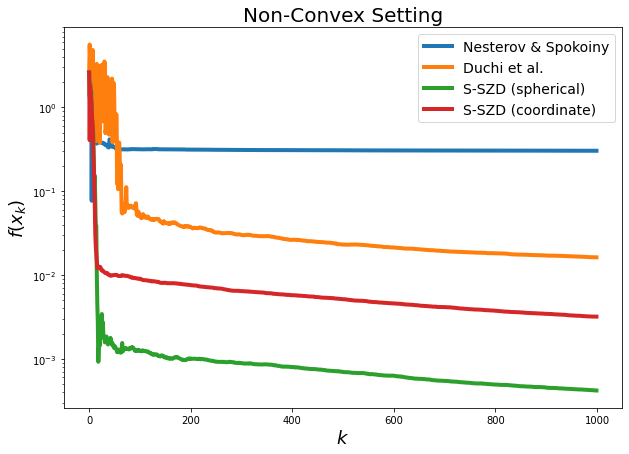

In [40]:

fig, ax = plt.subplots(figsize=(10, 7))
ax.set_title("Non-Convex Setting", fontsize=20)
ax.plot(range(len(nest_mean)),  nest_mean, '-', lw=4, label="Nesterov & Spokoiny")
ax.fill_between(range(len(nest_mean)),  nest_mean + nest_std, nest_mean - nest_std, alpha=0.4)

ax.plot(range(len(duchi_mean)), duchi_mean, '-', lw=4, label="Duchi et al.")
ax.fill_between(range(len(duchi_mean)),  duchi_mean + duchi_std, duchi_mean - duchi_std, alpha=0.4)

ax.plot(range(len(sph_mean)),   sph_mean, '-', lw=4, label="S-SZD (spherical)")
ax.fill_between(range(len(sph_mean)),  sph_mean + sph_std, sph_mean - sph_std, alpha=0.4)

ax.plot(range(len(coo_mean)),   coo_mean, '-', lw=4, label="S-SZD (coordinate)")
ax.fill_between(range(len(coo_mean)),  coo_mean + coo_std, coo_mean - coo_std, alpha=0.4)

ax.set_xlabel("$k$", fontsize=18)
ax.set_ylabel("$f(x_k)$", fontsize=18)
ax.legend(loc="upper right", fontsize=14)
ax.set_yscale("log")

#plt.savefig(out_dir + "/convex.pdf", bbox_inches='tight', transparent=True)